# Guided Project: Star Wars Survey

### 1.Load the dataset

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv",encoding='ISO-8859-1')

In [2]:
# Initial exploration of dataset
star_wars.head(10)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
# Check if there is any null value in column RespondentID
count = 0
for each in star_wars['RespondentID']:
    if pd.isnull(each):
        count += 1
print(count)

0


### 2.Data cleaning

In [4]:
# Count the number of unique items in a series
cols = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']
for each in cols:
    print(star_wars[each].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [5]:
# convert yes/no to booleans
yes_no = {"Yes":True,
          "No":False}
for each in cols:
    star_wars[each] = star_wars[each].map(yes_no)
    print(star_wars[each].head)

<bound method Series.head of 1        True
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29       True
30       True
        ...  
1157     True
1158    False
1159     True
1160    False
1161     True
1162     True
1163     True
1164     True
1165     True
1166     True
1167     True
1168     True
1169    False
1170     True
1171    False
1172     True
1173     True
1174     True
1175     True
1176     True
1177     True
1178     True
1179    False
1180     True
1181     True
1182     True
1183     True
1184    False
1185     True
1186     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool>
<bound method Series.head of 1      

In [6]:
for each in star_wars.columns[3:9]:
    print(star_wars[each].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64


In [7]:
import numpy
from numpy import nan
map_dict = {'Star Wars: Episode I  The Phantom Menace':True,
            'Star Wars: Episode II  Attack of the Clones':True,
            'Star Wars: Episode III  Revenge of the Sith':True,
            'Star Wars: Episode IV  A New Hope':True,
            'Star Wars: Episode V The Empire Strikes Back':True,
            'Star Wars: Episode VI Return of the Jedi':True,
            numpy.nan:False}
# Mapping
for col in star_wars.columns[3:9]: 
    star_wars[col] = star_wars[col].map(map_dict)
    print(star_wars[col].value_counts())

# Remane
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                     'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5',
                                     'Unnamed: 8':'seen_6'})

star_wars.columns[3:9]

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [8]:
# Convert each of the columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                                       'Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3','Unnamed: 12':'ranking_4',
                                       'Unnamed: 13':'ranking_5','Unnamed: 14':'ranking_6'})
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

### 3. Exploration

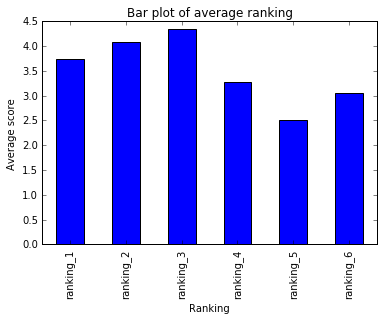

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
mean_ranking = star_wars[star_wars.columns[9:15]].mean()
mean_ranking.plot.bar()
plt.title('Bar plot of average ranking')
plt.xlabel('Ranking')
plt.ylabel('Average score')

From the bar plots above we can see that `Star Wars: Episode V The Empire Strikes Back` generates the lowest ranking which means it is the most favorite. `Star Wars: Episode III Revenge of the Sith`, however, is the least favorite.

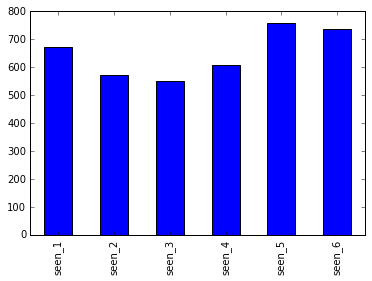

In [11]:
sum_movie = star_wars[star_wars.columns[3:9]].sum()
sum_movie.plot.bar()

`Star Wars: Episode V The Empire Strikes Back` has most views which explains why  it is the most favorite movie among the others

#### 3.1 Male/Female

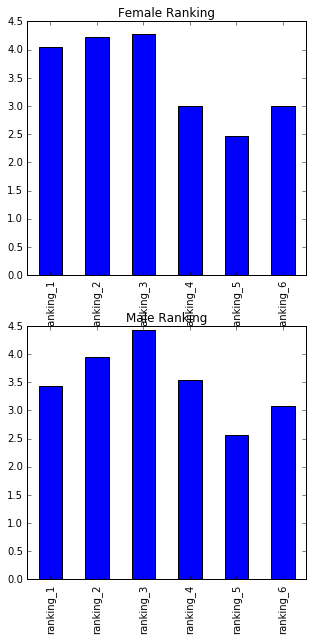

In [14]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
#Ranking
fig = plt.figure(figsize=(5,10))
ax1 = plt.subplot(2,1,1)
ax1 = males[males.columns[9:15]].mean().plot.bar()
ax1.set_title('Female Ranking')
ax2 = plt.subplot(2,1,2)
ax2 = females[females.columns[9:15]].mean().plot.bar()
ax2.set_title('Male Ranking')

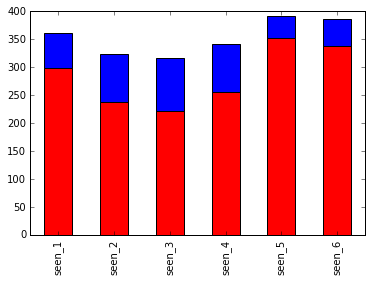

In [18]:
males[males.columns[3:9]].sum().plot.bar()
females[females.columns[3:9]].sum().plot.bar(color='Red')